In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('flights.csv')
print(df.columns)
df=df.sample(5000)


Index(['flight', 'time', 'wind_speed', 'wind_angle', 'battery_voltage',
       'battery_current', 'position_x', 'position_y', 'position_z',
       'orientation_x', 'orientation_y', 'orientation_z', 'orientation_w',
       'velocity_x', 'velocity_y', 'velocity_z', 'angular_x', 'angular_y',
       'angular_z', 'linear_acceleration_x', 'linear_acceleration_y',
       'linear_acceleration_z', 'speed', 'payload', 'altitude', 'date',
       'time_day', 'route'],
      dtype='object')


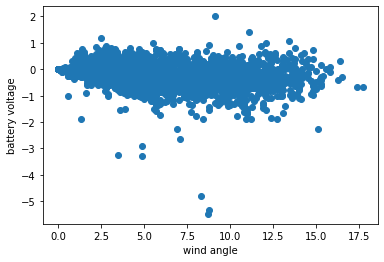

In [3]:
%matplotlib inline
plt.xlabel('wind angle')
plt.ylabel('battery voltage')
plt.scatter(df.wind_speed,df.velocity_x)

In [4]:
reg = linear_model.LinearRegression()
reg.fit(df[['wind_speed']], df.velocity_x)

LinearRegression()

In [5]:
reg.predict(np.array([11]).reshape(1,1))

array([-0.37673967])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [7]:
velocity_x = df.drop(['velocity_x', 'date', 'altitude', 'time_day', 'route'], axis=1)
Y1 = df['velocity_x']
velocity_x_train, velocity_x_test, Y1_train, Y1_test = train_test_split(velocity_x, Y1, test_size=0.33)

velocity_y = df.drop(['velocity_y', 'date', 'altitude', 'time_day', 'route'], axis=1)
Y2 = df['velocity_y']
velocity_y_train, velocity_y_test, Y2_train, Y2_test = train_test_split(velocity_y, Y2, test_size=0.33)

velocity_z = df.drop(['velocity_z', 'date', 'altitude', 'time_day', 'route'], axis=1)
Y3 = df['velocity_z']
velocity_z_train, velocity_z_test, Y3_train, Y3_test = train_test_split(velocity_z, Y3, test_size=0.33)

In [8]:
#from sklearn import preprocessing

#lab_enc = preprocessing.LabelEncoder()
#Y_train_encoded = lab_enc.fit_transform(Y_train)
#Y_test_encoded = lab_enc.fit_transform(Y_test)
#print(Y_train_encoded)


In [9]:
clfx = SVC(kernel='linear')
clfx.fit(velocity_x_train, Y1_train.astype('int'))

clfy = SVC(kernel='linear')
clfy.fit(velocity_y_train, Y2_train.astype('int'))

clfz = SVC(kernel='linear')
clfz.fit(velocity_z_train, Y3_train.astype('int'))

SVC(kernel='linear')

In [125]:
Y1_pred = clfx.predict(velocity_x_test)
Y2_pred = clfx.predict(velocity_y_test)
Y3_pred = clfx.predict(velocity_z_test)

In [126]:
print(classification_report(Y1_test.astype('int'), Y1_pred))

              precision    recall  f1-score   support

          -2       0.00      0.00      0.00         0
          -1       0.00      0.00      0.00        28
           0       0.98      1.00      0.99      1617
           1       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1

    accuracy                           0.98      1650
   macro avg       0.12      0.12      0.12      1650
weighted avg       0.96      0.98      0.97      1650



J:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
J:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
J:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
J:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Rec